# Use this to just create a list of the interpolated airfoil

In [16]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def interpolate_airfoil(file_path):
    data = np.loadtxt(file_path, skiprows=1)
    x = data[:, 0]
    y = data[:, 1]

    # Find index of leading edge (minimum x) to split data correctly
    leading_edge_index = np.argmin(x)
    
    # Prepare the first and second halves
    x1, y1 = x[:leading_edge_index+1][::-1], y[:leading_edge_index+1][::-1]
    x2, y2 = x[leading_edge_index:], y[leading_edge_index:]

    x_new1 = np.linspace(x1.min(), x1.max(), 100)
    x_new2 = np.linspace(x2.min(), x2.max(), 100)

    # Create cubic splines and interpolate
    cs1 = CubicSpline(x1, y1)
    cs2 = CubicSpline(x2, y2)

    y_new1 = cs1(x_new1)
    y_new2 = cs2(x_new2)

    # Correctly combine the two halves: Ensure continuity and correct sequence
    x_new_combined = np.concatenate([x_new1[:-1], x_new2])  # Avoid duplicating the leading edge
    y_new_combined = np.concatenate([y_new1[:-1], y_new2])

    interpolated_data = np.column_stack((x_new_combined, y_new_combined))
    original_data = np.column_stack((x, y))

    return interpolated_data, original_data


# Use this to interpolate and save the airfoil to a new .dat file

In [1]:
import os
import numpy as np
from scipy.interpolate import CubicSpline

def interpolate_airfoil(file_path):
    # Load the data, skipping the airfoil name
    data = np.loadtxt(file_path, skiprows=1)
    
    # Extracting airfoil name from file path
    airfoil_name = os.path.basename(file_path).replace('.dat', '')
    
    x = data[:, 0]
    y = data[:, 1]

    # Interpolating as before
    leading_edge_index = np.argmin(x)
    x1, y1 = x[:leading_edge_index+1][::-1], y[:leading_edge_index+1][::-1]
    x2, y2 = x[leading_edge_index:], y[leading_edge_index:]

    x_new1 = np.linspace(x1.max(), x1.min(), 100)
    x_new2 = np.linspace(x2.min(), x2.max(), 100)

    cs1 = CubicSpline(x1, y1)
    cs2 = CubicSpline(x2, y2)

    y_new1 = cs1(x_new1)
    y_new2 = cs2(x_new2)

    x_new_combined = np.concatenate([x_new1, x_new2])
    y_new_combined = np.concatenate([y_new1, y_new2])

    interpolated_data = np.column_stack((x_new_combined, y_new_combined))
    
    # Original data, for comparison or other purposes
    original_data = np.column_stack((x, y))

    # Creating the output path
    output_folder = 'cleaned_airfoils'
    os.makedirs(output_folder, exist_ok=True)
    output_file_path = os.path.join(output_folder, f"{airfoil_name}_clean.dat")
    
    # Saving the interpolated data
    np.savetxt(output_file_path, interpolated_data, fmt='%0.8f', newline='\r\n', header='', comments='')

    return interpolated_data, original_data, output_file_path



# Run the next cell to run through the dataset and save the interpolated and cleaned data

In [2]:
path = 'coord_seligFmt/'
files = [f for f in os.listdir(path) if f.endswith('.dat')]
files_cleaned = 0
for file in files:
    print("files_cleaned: ", files_cleaned)
    print(f'Interpolating {file}...')
    interpolate_airfoil(os.path.join(path, file))
    files_cleaned += 1


files_cleaned:  0
Interpolating sd8020.dat...
files_cleaned:  1
Interpolating doa5.dat...
files_cleaned:  2
Interpolating arad10.dat...
files_cleaned:  3
Interpolating fxl142k.dat...
files_cleaned:  4
Interpolating ag09.dat...
files_cleaned:  5
Interpolating fx66s171.dat...
files_cleaned:  6
Interpolating goe675.dat...
files_cleaned:  7
Interpolating e201.dat...
files_cleaned:  8
Interpolating e598.dat...
files_cleaned:  9
Interpolating e58.dat...
files_cleaned:  10
Interpolating ag13.dat...
files_cleaned:  11
Interpolating davis.dat...
files_cleaned:  12
Interpolating s4095.dat...
files_cleaned:  13
Interpolating goe572.dat...
files_cleaned:  14
Interpolating goe621.dat...
files_cleaned:  15
Interpolating n6h10.dat...
files_cleaned:  16
Interpolating goe796.dat...
files_cleaned:  17
Interpolating ls421mod.dat...
files_cleaned:  18
Interpolating sc20612.dat...
files_cleaned:  19
Interpolating naca663418.dat...
files_cleaned:  20
Interpolating oa206.dat...
files_cleaned:  21
Interpolati

In [17]:
# function to plot the interpolated airfoil
def plot_interpolated_airfoil(interpolated_list, original_list):
    plt.scatter(original_list[:,0], original_list[:,1], s=.6, c='r')
    plt.scatter(interpolated_list[:,0], interpolated_list[:,1], s=.6, c='b')
    plt.axis('equal')
    plt.axis('off')
    plt.legend(['Original Airfoil', 'Interpolated Airfoil'])
    plt.show()

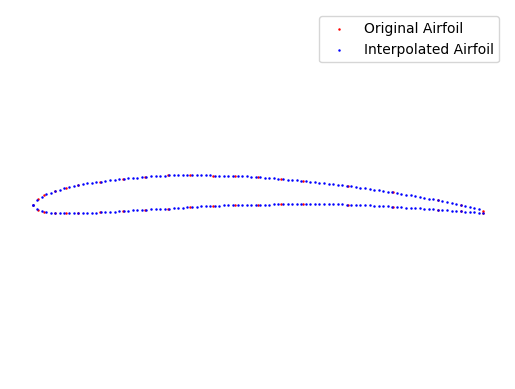

interpolated shape:  (199, 2)


In [18]:
a18_airfoil_interp, a18_airfoil_original = interpolate_airfoil("coord_seligFmt/a18.dat")
#plot_interpolated_airfoil(a18_airfoil)
plot_interpolated_airfoil(a18_airfoil_interp, a18_airfoil_original)
print("interpolated shape: ", a18_airfoil_interp.shape)

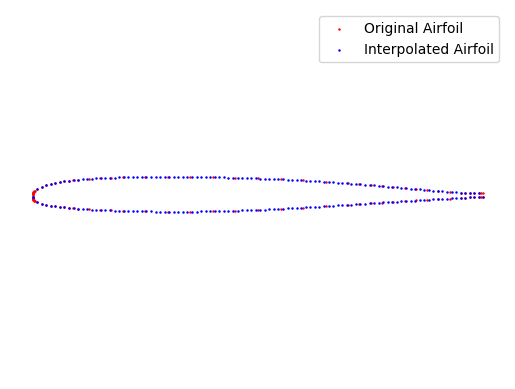

interpolated shape:  (199, 2)


In [19]:
a63a108c_airfoil_interp, a63a108c_airfoil = interpolate_airfoil("coord_seligFmt/a63a108c.dat")
plot_interpolated_airfoil(a63a108c_airfoil_interp,a63a108c_airfoil)
print("interpolated shape: ", a63a108c_airfoil_interp.shape)